## Create visualizations using Matplotib, Seaborn and Folium

### Objectives

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations

### Setup

For this lab, i will be using the following libraries:

- pandas for managing the data.
- numpy for mathematical operations.
- matplotlib for plotting.
- seaborn for plotting.
- Folium for plotting.


### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### Scenario

In this assignment i will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.
- recession period 1 - year 1980
- recession period 2 - year 1981 to 1982
- recession period 3 - year 1991
- recession period 4 - year 2000 to 2001
- recession period 5 - year end 2007 to mid 2009
- recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

### Data Description

The dataset used for this visualization assignment contains historical_automobile_sales data representing automobile sales and related variables during recession and non-recession period.

The dataset includes the following variables:
1. Date:  The date of the observation.
2. Recession:  A binary variable indicating recession period; 1 means it was recession, 0 means it was normal.
3. Automobile_Sales:  The number of vehicles sold during the period.
4. GDP:  The per capita GDP value in USD.
5. Unemployment_Rate:  The monthly unemployment rate.
6. Consumer_Confidence:  A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
7. Seasonality_Weight:  The weight representing the seasonality effect on automobile sales during the period.
8. Price:  The average vehicle price during the period.
9. Advertising_Expenditure:  The advertising expenditure of the company.
10. Vehicle_Type:  The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports.
11. Competition:  The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
12. Month:  Month of the observation extracted from Date..
13. Year:  Year of the observation extracted from Date.
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

In [3]:
df = pd.read_csv('/Users/akashashokdeokar/Downloads/historical_automobile_sales.csv')
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [5]:
df.tail()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia
527,12/31/2023,2023,Dec,0,95.92,0.34,25240.425,2319,3,13.518,-1.064211,2.1,3538.5,Smallfamiliycar,Georgia


In [6]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

## Creating Visualizations for Data Analysis

### TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.

In [9]:
# i have provided data with years from 1980-2023: 
df['Year'].unique()

array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020, 1984, 1985, 1986, 1987, 1988, 1989, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2003, 2004, 2005, 2006, 2007, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023])

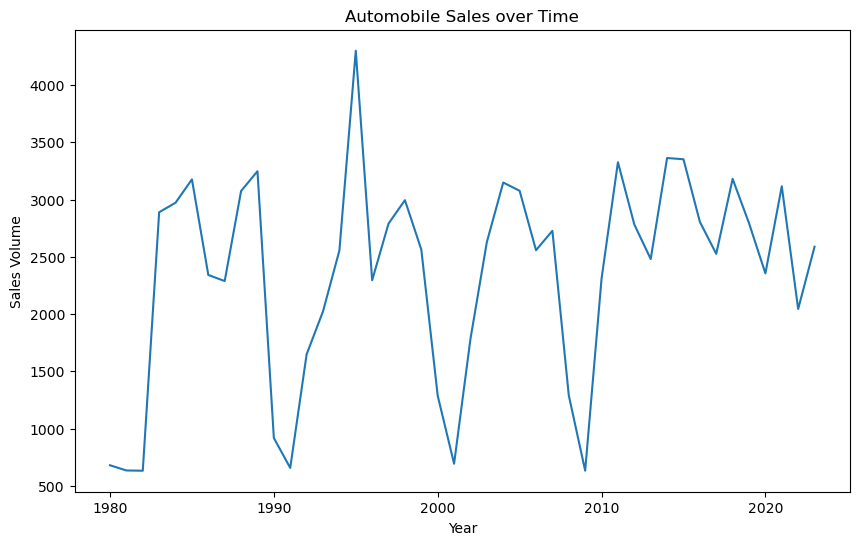

In [10]:
# following line of code group column Year and calculate mean of Automobile_Sales 
# for particular year:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

#this will plot line chart:
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

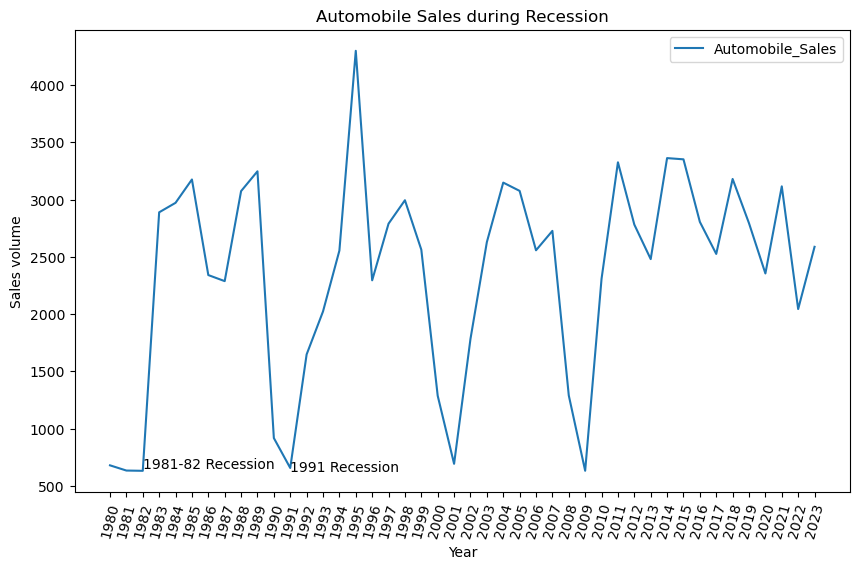

In [34]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line') 

#to include all the years:
plt.xticks(list(range(1980,2024)), rotation = 75)
 
plt.xlabel('Year')
plt.ylabel('Sales volume')
plt.title('Automobile Sales during Recession')
             
# two years of recession:
plt.text(1982, 650, '1981-82 Recession')
plt.text(1991, 625, '1991 Recession')
plt.legend()
plt.show()

### TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [12]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [13]:
# to see how many vehicle categories are there:
df['Vehicle_Type'].unique()

array(['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Executivecar'], dtype=object)

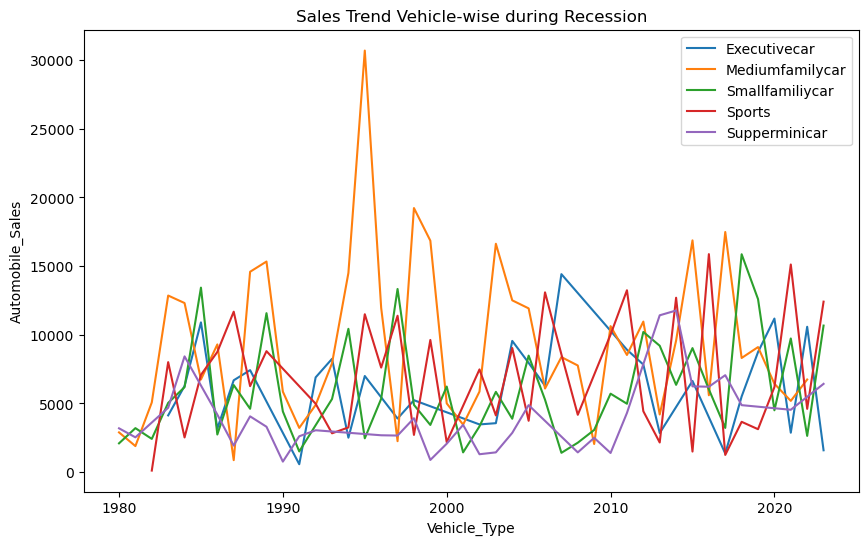

In [14]:
plt.figure(figsize=(10, 6))
#grouping Year column and Vehicle_Type:

df_Mline = df.groupby(['Year','Vehicle_Type'],
           as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Vehicle_Type')
plt.ylabel('Automobile_Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

From the above plot, insights which i gained on the sales of various vehicle types:

During recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle
while sales of the superminicar, executivecar and smallfamilycar increased.

### TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

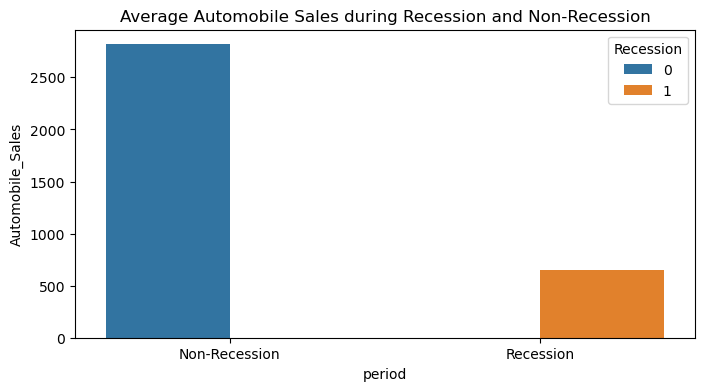

In [50]:
#grouping Recession automobile sales:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

#by barplot it will show in which period sales were low/high:
plt.figure(figsize=(8,4))
sns.barplot(x='Recession', y='Automobile_Sales',data=new_df, hue='Recession')
plt.xlabel('period')
plt.ylabel('Automobile_Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

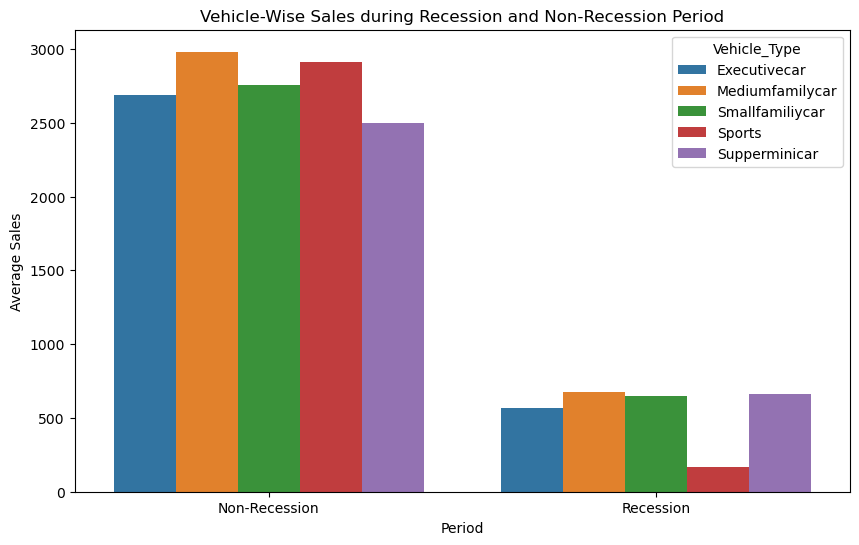

In [16]:
#filters data for recessionary periods:
recession_data = df[df['Recession'] == 1]

#groups Recession, Vehicle_Type for average Automobile_Sales:

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()


#creates the grouped bar chart: 
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

Insights which i gained on the sales of various vehicle types: 

There is drastic decline in the overall sales of the automobiles during recession , the most affected type of vehicle is executivecar and sports

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.


In [35]:
df['Recession'].unique()

array([1, 0])

lets see how the GDP varies over time during recession and non-recession periods


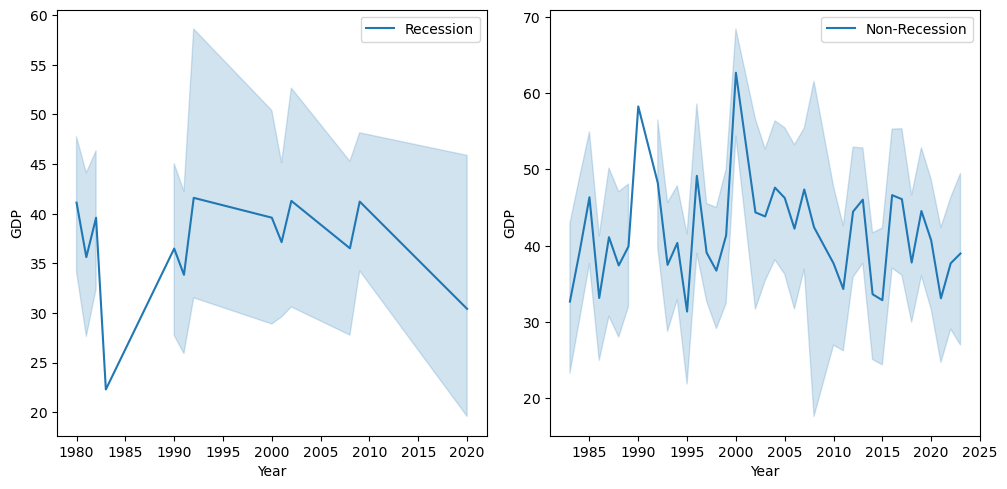

In [36]:
#creates dataframes for recession and non-recession period:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#using subplot:
plt.figure(figsize=(10, 5))
    
#subplot 1:
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data= rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
   
#subplot 1:
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
    
plt.tight_layout()
plt.show()
    


 During recession the GDP of the country was in a low range, might have afected the overall sales of the company


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

In [39]:
df['Seasonality_Weight'].unique()

array([0.5 , 0.75, 0.2 , 1.  , 0.25, 0.07, 0.  , 1.5 , 0.12, 0.34])

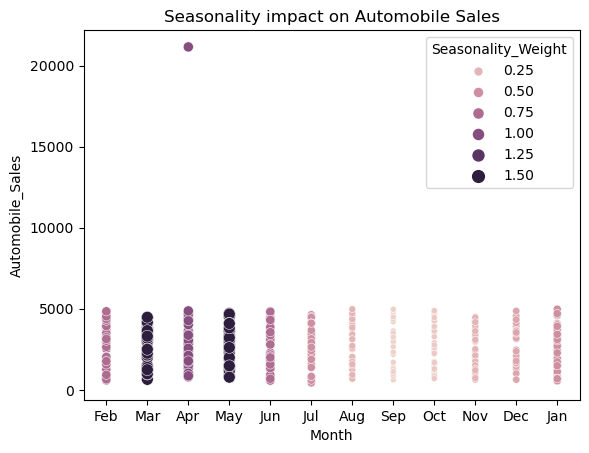

In [38]:
# dataframe for non-recession period:
non_rec_data = df[df['Recession'] == 0]

#for bubble effect    
size=non_rec_data['Seasonality_Weight'] 
  
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales',
                size=size,hue='Seasonality_Weight', legend=True)
    

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

It is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April.

### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

In [21]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


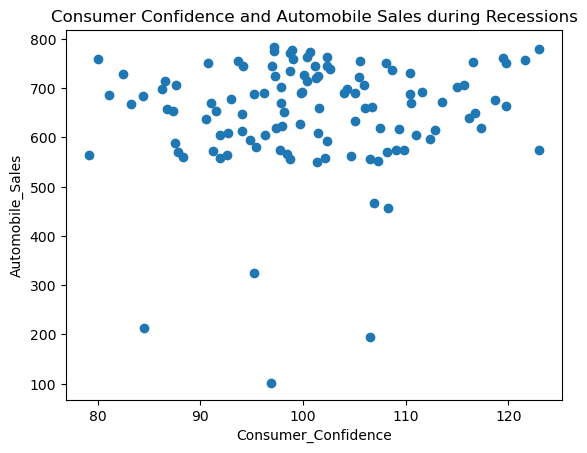

In [22]:
#Create dataframes for recession period:
rec_data = df[df['Recession'] == 1]
plt.scatter(recession_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()

#### How does the average vehicle price relate to the sales volume during recessions?

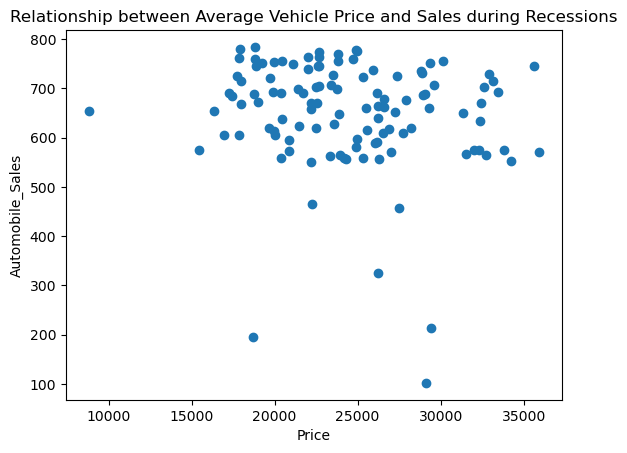

In [23]:
#Create dataframes for recession period:
rec_data = df[df['Recession'] == 1]

plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

There is not much relation.

### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods?

In [42]:
#filters the data: 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

In [43]:
Rdata.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [44]:
NRdata.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois


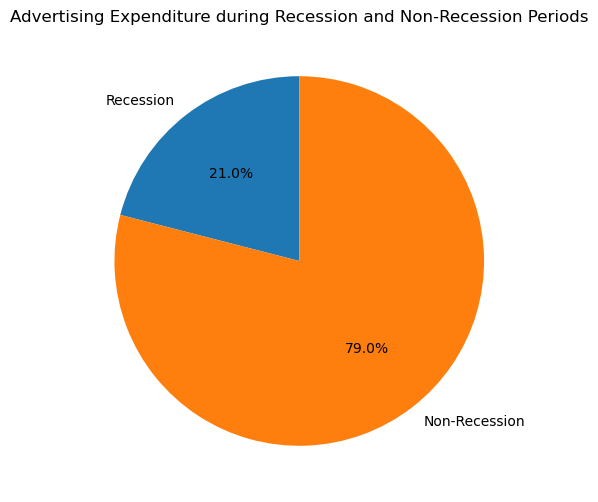

In [24]:
#calculate the total advertising expenditure for both periods:
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

#creates a pie chart for the advertising expenditure: 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()


It seems ABCAutomotives spent much more on the advertisements during non-recession periods as compared to during recession times.



### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

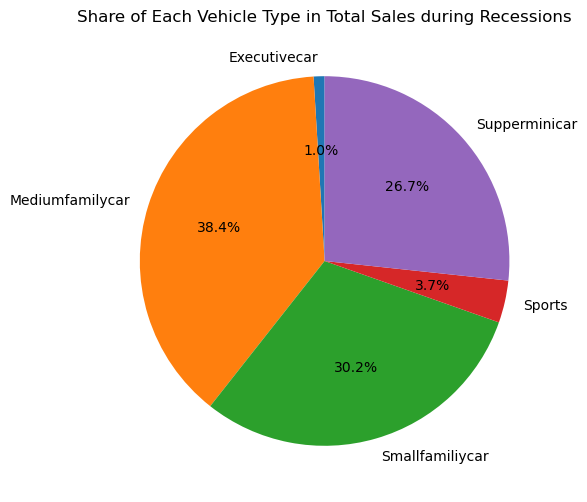

In [45]:
#filters the data: 
Rdata = df[df['Recession'] == 1]

#calculate the sales volume by vehicle type during recession:
VTsales = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

#creates a pie chart for the share of each vehicle type in total sales 
#during recession:
plt.figure(figsize=(8, 6))
labels = VTsales.index
sizes = VTsales.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Share of Each Vehicle Type in Total Sales during Recessions')

plt.show()

During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

### TASK 1.9: Develop a countplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.


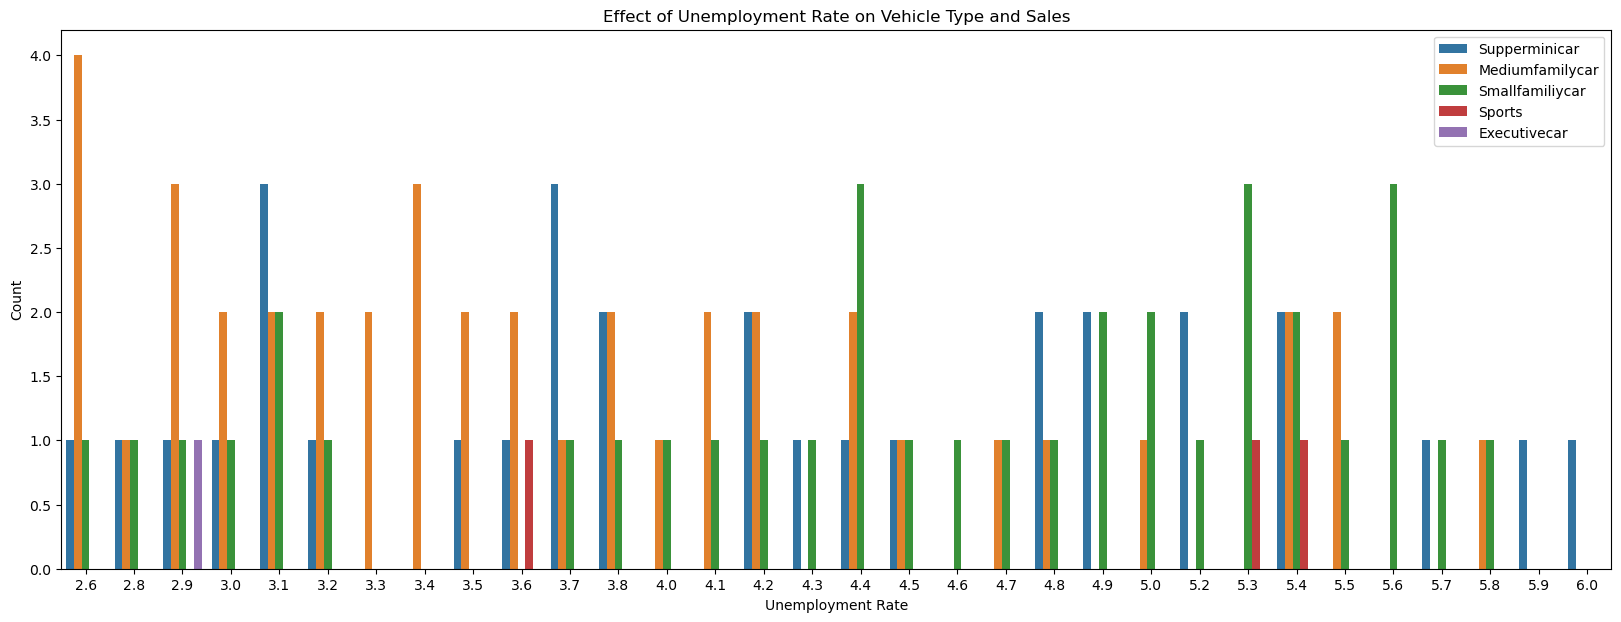

In [48]:
#filters data:
data= df[df['Recession'] == 1]
    
plt.figure(figsize=(20, 7))
    
sns.countplot(data=data, x='unemployment_rate', hue='Vehicle_Type')
    
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc='upper right')
plt.show()

During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

thanku, you can correct me if i have done a mistake above!